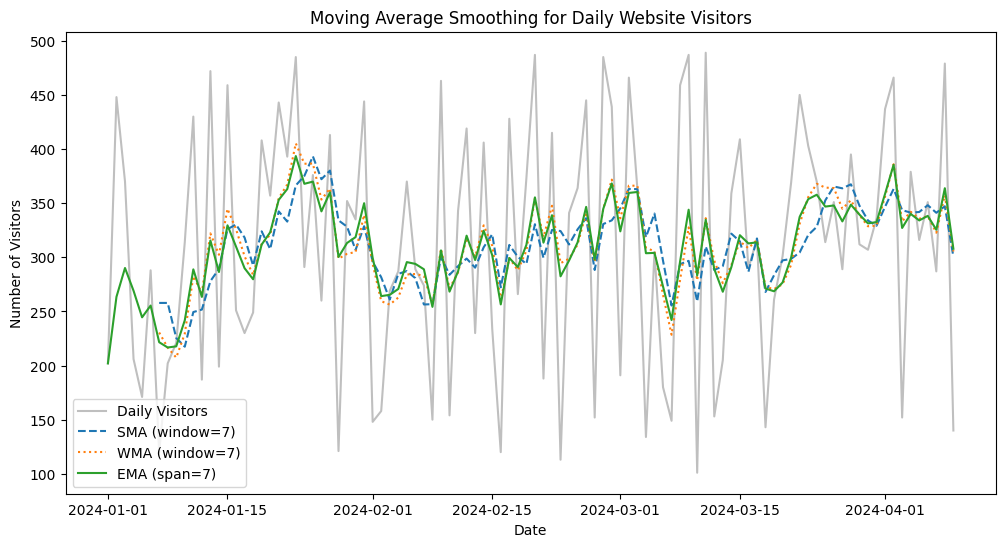

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simple_moving_average(data, window_size):
    return data.rolling(window=window_size).mean()

def weighted_moving_average(data, window_size):
    weights = np.arange(1, window_size + 1)
    return data.rolling(window=window_size).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

def exponential_moving_average(data, span):
    return data.ewm(span=span, adjust=False).mean()

# Example usage
def main():
    # Generate sample daily website visitors data
    np.random.seed(42)
    days = pd.date_range(start='2024-01-01', periods=100, freq='D')
    visitors = np.random.randint(100, 500, size=100)  # Simulated visitor counts
    visitor_series = pd.Series(visitors, index=days)

    window_size = 7
    span = 7

    sma = simple_moving_average(visitor_series, window_size)
    wma = weighted_moving_average(visitor_series, window_size)
    ema = exponential_moving_average(visitor_series, span)

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(visitor_series, label='Daily Visitors', color='gray', alpha=0.5)
    plt.plot(sma, label=f'SMA (window={window_size})', linestyle='dashed')
    plt.plot(wma, label=f'WMA (window={window_size})', linestyle='dotted')
    plt.plot(ema, label=f'EMA (span={span})', linestyle='solid')

    plt.legend()
    plt.title('Moving Average Smoothing for Daily Website Visitors')
    plt.xlabel('Date')
    plt.ylabel('Number of Visitors')
    plt.show()

if __name__ == "__main__":
    main()
